In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [6]:
all_dfs = []
for i in [1,3,4,6,7,8,9,10]:
    print(i)
    df = pd.read_csv('data/'+str(i)+'_mw_disp_full.csv')
    df.columns = ['x', 'y', 'z']
    df['t_ns'] = np.arange(df.shape[0])*0.1/1000
    df = df.iloc[::1000, :] # keep only every 100 ps
    df['traj'] = i
    all_dfs.append(df)
df = pd.concat(all_dfs)

1
3
4
6
7
8
9
10


In [7]:
def plot_sample(ax, fig, df, frac=0.01, color='t_ns', plot_cbar=False):
    df_sample = df.sample(frac=frac)
    c = ax.scatter(xs=df_sample.x, ys = df_sample.y, zs = df_sample.z, c=df_sample[color])
    if plot_cbar:
        fig.colorbar(c)
    return ax, fig

## Visualize all trajectories

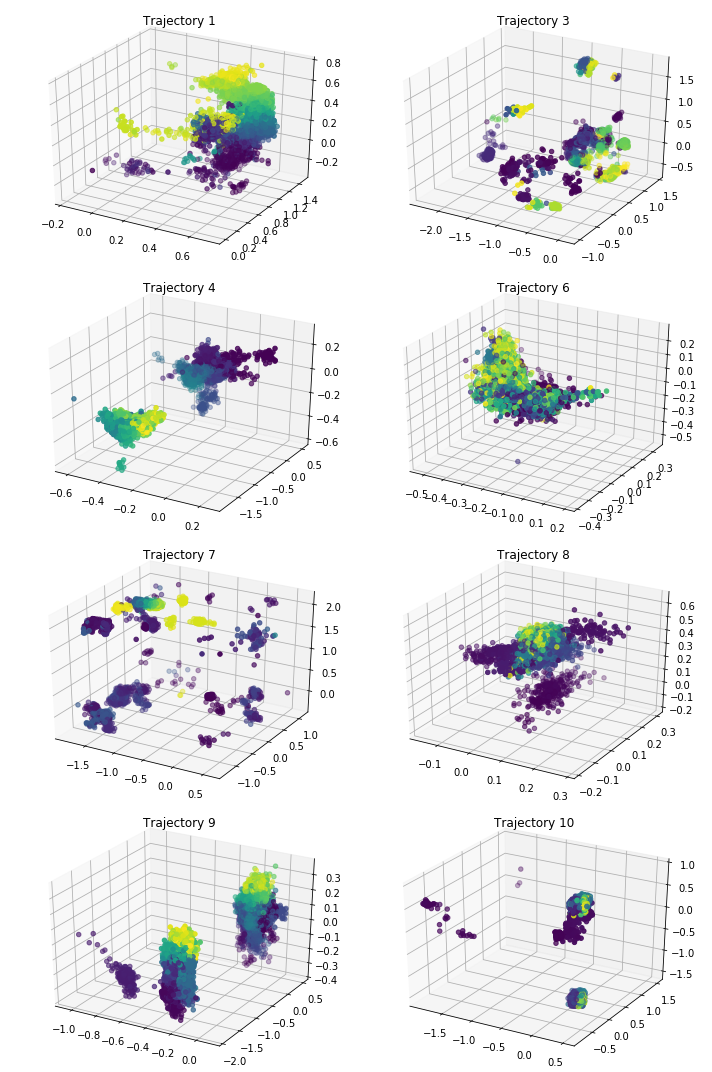

In [8]:
fig = plt.figure(figsize=(10,15))

for i, j in enumerate([1, 3,4,6,7,8,9,10]):
    ax = fig.add_subplot(4,2,i+1,projection='3d')

    plot_sample(ax, fig, df.loc[df.traj==j, :], frac=1)
    ax.set_title('Trajectory {}'.format(j))
plt.tight_layout()


## Visualize moving window of trajectory 6

### With 0.1% of the data

In [9]:
xyz = df.loc[df['traj']==6,:]

In [10]:
xyz.shape

(10000, 5)

In [18]:
xyz.loc[:,'t_ns'].iloc[1]

0.10000000000000001

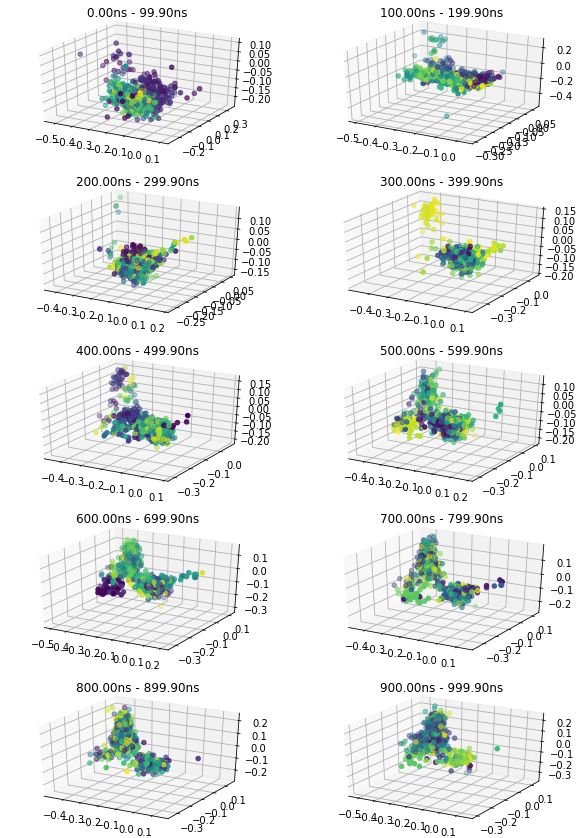

In [20]:
dt = int(1000)
n_steps = int(xyz.shape[0]/dt)
fig = plt.figure(figsize=(10,15))

for i in range(n_steps):
    ax = fig.add_subplot(n_steps/2,2,i+1,projection='3d')
    plot_sample(ax, fig, xyz.iloc[i*dt:(i+1)*dt,:], frac=1)
    ax.set_title('{0:4.2f}ns - {1:4.2f}ns'.format(xyz.loc[:, 't_ns'].iloc[i*dt], 
                                                  xyz.loc[:, 't_ns'].iloc[(i+1)*dt-1]))



### With 1% of the data

In [21]:
i = 6
df = pd.read_csv('data/'+str(i)+'_mw_disp_full.csv')
df.columns = ['x', 'y', 'z']
df['t_ns'] = np.arange(df.shape[0])*0.1/1000
df = df.iloc[::100, :] # keep only every 10 ps
df['traj'] = i


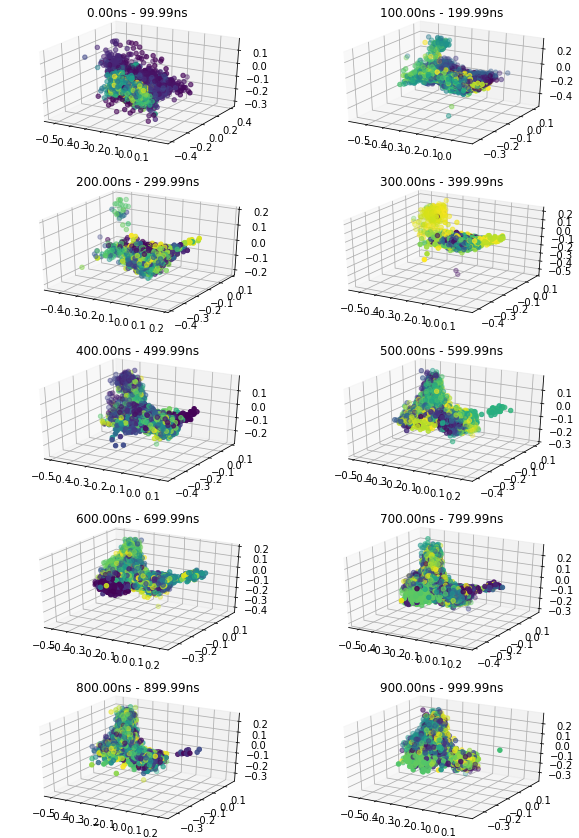

In [22]:
xyz = df.loc[df['traj']==6,:]
dt = int(10000)
n_steps = int(xyz.shape[0]/dt)
fig = plt.figure(figsize=(10,15))

for i in range(n_steps):
    ax = fig.add_subplot(n_steps/2,2,i+1,projection='3d')
    plot_sample(ax, fig, xyz.iloc[i*dt:(i+1)*dt,:], frac=1)
    ax.set_title('{0:4.2f}ns - {1:4.2f}ns'.format(xyz.loc[:, 't_ns'].iloc[i*dt], 
                                              xyz.loc[:, 't_ns'].iloc[(i+1)*dt-1]))